In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ppr.robot import Robot_2P3R,Robot_3R
from ppr.path import TrajectoryPt, TolerancedNumber
from ppr.geometry import Rectangle
from ppr.path import cart_to_joint
from ppr.path import get_shortest_path

In [8]:
# ROBOT
robot1 = Robot_3R([2, 2, 2])

# PATH
dx    = np.linspace(3, 4, 10)
dy    = TolerancedNumber(1.0, 1.0, 1.1, samples=5)
angle = TolerancedNumber(0.0, -np.pi/2, np.pi/2, samples=10)
path1 = [TrajectoryPt([xi, dy, angle]) for xi in dx]

# COLLISION SCENE
sc1 = [Rectangle(3, 1.3, 2, 1, -0.1),
       Rectangle(3, 0.5, 2, 0.3, 0)]

In [9]:
path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)
print([len(qp) for qp in path_js])

[80, 58, 44, 34, 24, 20, 20, 20, 18, 16]


converting type of Q
[ 8 18 20 24 14 14 14 14 10  6]
True


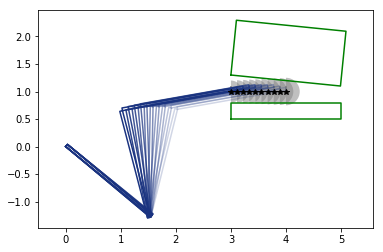

In [10]:
sol = get_shortest_path(path_js)
print(sol['success'])

fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol['path'])
for r in sc1: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()

In [17]:
tp = path1[0]
print(tp)
tp.p[1].l

[ 3.  1.  0.]


1.0